# import library

In [1]:
from pyefriend import load_api

# api 로드(High-level)

- target: 국내 'domestic' / 해외 'overseas'
- account: 사용할 계좌
- password: 사용할 계좌 입력 비밀번호

In [2]:
api = load_api(target='domestic', account='5005775101', password='Dmazhffk1!!')

[INFO]2021-11-10 01:08:41 - pyefriend/helper.py/run_app, 29: Start APP
[INFO]2021-11-10 01:08:41 - pyefriend/api.py/__init__, 73: 계좌가 존재하는 지 확인합니다.: '5005775101'
[INFO]2021-11-10 01:08:41 - pyefriend/api.py/__init__, 79: 모의투자에 성공적으로 연결되었습니다. 타겟 계좌: '5005775101'


In [3]:
import numpy as np

In [4]:
from datetime import datetime


In [42]:
rows = api.get_kospi_histories()
rows

[{'standard_date': '20211109',
  'minimum': 2949.0,
  'maximum': 2987.0,
  'opening': 2958.0,
  'closing': 2962.0,
  'volume': 708773},
 {'standard_date': '20211108',
  'minimum': 2930.0,
  'maximum': 2968.0,
  'opening': 2965.0,
  'closing': 2960.0,
  'volume': 560205},
 {'standard_date': '20211105',
  'minimum': 2953.0,
  'maximum': 3003.0,
  'opening': 3003.0,
  'closing': 2969.0,
  'volume': 688028},
 {'standard_date': '20211104',
  'minimum': 2978.0,
  'maximum': 3011.0,
  'opening': 3000.0,
  'closing': 2983.0,
  'volume': 772024},
 {'standard_date': '20211103',
  'minimum': 2969.0,
  'maximum': 3020.0,
  'opening': 3020.0,
  'closing': 2975.0,
  'volume': 658648},
 {'standard_date': '20211102',
  'minimum': 2995.0,
  'maximum': 3034.0,
  'opening': 2995.0,
  'closing': 3013.0,
  'volume': 525853},
 {'standard_date': '20211101',
  'minimum': 2976.0,
  'maximum': 2991.0,
  'opening': 2984.0,
  'closing': 2978.0,
  'volume': 475382},
 {'standard_date': '20211029',
  'minimum': 2965

In [43]:
rows = [
    {
        'standard_date': datetime.strptime(row['standard_date'], '%Y%m%d').date(),
        'volume': row['volume'],
        'lower': np.min([row['minimum'], row['opening'], row['closing']]),
        'upper': np.max([row['maximum'], row['opening'], row['closing']]),
        'mean': np.mean([row['maximum'], row['opening'], row['closing'], row['minimum']])
    }
    for row in rows
]

In [44]:
rows_v = []
for i, row in enumerate(rows):
    data = row.copy()
    
    if i == 0:
        next_row = rows[1]        
        data['v'] = next_row['mean'] - row['mean']
        
    elif i == len(rows):
        prev_row = rows[i - 1]
        data['v'] = row['mean'] - prev_row['mean']
        
    else:
        next_row = rows[1]
        prev_row = rows[i - 1]
        data['v'] = (next_row['mean'] - prev_row['mean']) / 2
    
    rows_v.append(data)



In [45]:
rows_va = []

for i, row in enumerate(rows_v):
    data = row.copy()
    
    if i == 0:
        next_row = rows_v[1]        
        data['a'] = next_row['v'] - row['v']
        
    elif i == len(rows):
        prev_row = rows_v[i - 1]
        data['a'] = row['v'] - prev_row['v']
        
    else:
        next_row = rows_v[1]
        prev_row = rows_v[i - 1]
        data['a'] = (next_row['v'] - prev_row['v']) / 2
    
    rows_va.append(data)


In [87]:
new_rows = [
    {
        **row,
        'f': row['volume'] * row['a'],
        'moment': row['volume'] * row['v'],
        'kinetic': row['volume'] * row['v'] * row['v'] /2,
        'potential': row['volume'] * row['mean'] * 0.03
    }
    for row in rows_va
]


In [88]:
x = [item['standard_date'] for item in new_rows]
y1 = [item['lower'] for item in new_rows]
y2 = [item['upper'] for item in new_rows]
y_v = [item['v'] for item in new_rows]
y_a = [item['a'] for item in new_rows]
y_f = [item['f'] for item in new_rows]
y_moment = [item['moment'] for item in new_rows]
y_kinetic = [item['kinetic'] for item in new_rows]
y_potential = [item['potential'] for item in new_rows]


In [89]:
new_rows

[{'standard_date': datetime.date(2021, 11, 9),
  'volume': 708773,
  'lower': 2949.0,
  'upper': 2987.0,
  'mean': 2964.0,
  'v': -8.25,
  'a': 4.125,
  'f': 2923688.625,
  'moment': -5847377.25,
  'kinetic': 24120431.15625,
  'potential': 63024095.16},
 {'standard_date': datetime.date(2021, 11, 8),
  'volume': 560205,
  'lower': 2930.0,
  'upper': 2968.0,
  'mean': 2955.75,
  'v': -4.125,
  'a': 2.0625,
  'f': 1155422.8125,
  'moment': -2310845.625,
  'kinetic': 4766119.1015625,
  'potential': 49674777.8625},
 {'standard_date': datetime.date(2021, 11, 5),
  'volume': 688028,
  'lower': 2953.0,
  'upper': 3003.0,
  'mean': 2982.0,
  'v': 0.0,
  'a': 0.0,
  'f': 0.0,
  'moment': 0.0,
  'kinetic': 0.0,
  'potential': 61550984.879999995},
 {'standard_date': datetime.date(2021, 11, 4),
  'volume': 772024,
  'lower': 2978.0,
  'upper': 3011.0,
  'mean': 2993.0,
  'v': -13.125,
  'a': -2.0625,
  'f': -1592299.5,
  'moment': -10132815.0,
  'kinetic': 66496598.4375,
  'potential': 69320034.96}

In [90]:
from matplotlib import pyplot as plt, dates as mdates

In [91]:
def show(ys, title):
    print(title)
    fig = plt.figure()
    fig.title = title
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    
    for y in ys:
        plt.plot(x, y)
    
    plt.gcf().autofmt_xdate()

d
v
f
energy


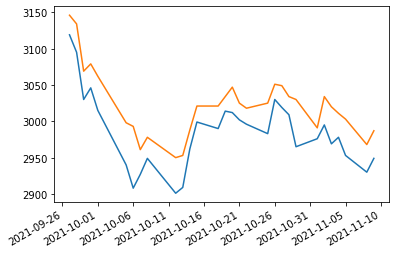

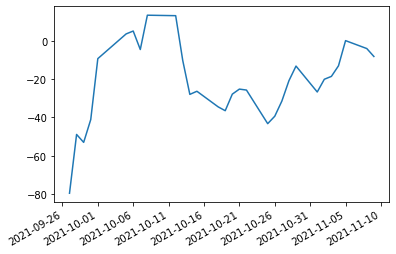

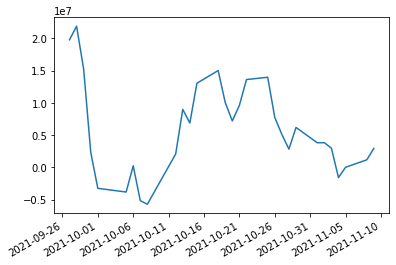

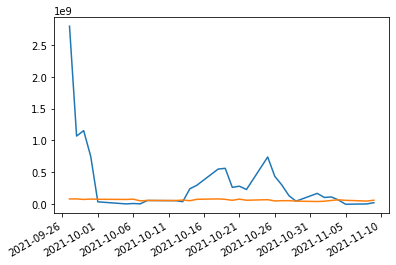

In [92]:
show([y1, y2], 'd')

show([y_v, ], 'v')

# show([y_a, ], 'a')

show([y_f, ], 'f')

show([y_kinetic, y_potential], 'energy')

In [8]:
import matplotlib.pyplot as  plt

In [ ]:
plt.plot()

In [3]:
api.get_sp500_histories(standard='H')

[{'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4682.88,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.0,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.2,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.19,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.16,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.81,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.83,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'max

In [16]:
product_code = '0001'
api.conn.GetSingleDataStockMaster(product_code, 1)

''

In [32]:
columns = [
    dict(index=0, key='standard_date', pk=True),
    dict(index=7, key='mininum', dtype=float),
    dict(index=6, key='maximum', dtype=float),
    dict(index=5, key='opening', dtype=float),
    dict(index=1, key='closing', dtype=float),
    dict(index=8, key='volume', dtype=float),
]

(
    api.set_data(0, 'N')  # 0: 시장 분류 코드, 'N': 기본
        .set_data(1, 'VIX')  # 1: 종목코드
        .set_data(2, '0')
        .request_data('PFX06910000')
        .get_data(multiple=True, columns=columns)
)

[]

In [4]:
(
    api.set_data(0, 'N')  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, 'NDAQ')  # 1: 종목코드
        .request_data('PFX06910000')
)

print([api.get_data(i) for i in range(10)])

['20211108', '211.69', '-1.14', '5', '-0.54', '214.10', '214.21', '209.54', '566061', '']


In [3]:
(
    api.set_data(block_index=0, field_index=0, value='U')
    .set_data(block_index=0, field_index=1, value='0001')
#     .set_data(block_index=1, field_index=2, value='20211109')
#     .set_data(block_index=1, field_index=3, value='D')
)

In [4]:
api.get_data(0)

''

004170: 신세계 주식 종목코드

In [3]:
product_code = '004170'
standard = 'D'

In [6]:
(
    api.set_data(0, 'J')  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, product_code)  # 1: 종목코드
        .set_data(2, standard)  # D: 일/ W: 주/ M: 월
        .request_data('SCPD')
)

columns = [
    dict(index=0, key='standard_date', pk=True),
    dict(index=3, key='mininum', dtype=int),
    dict(index=2, key='maximum', dtype=int),
    dict(index=1, key='opening', dtype=int),
    dict(index=4, key='closing', dtype=int),
    dict(index=5, key='volume', dtype=int),
]

data = api.get_data(multiple=True, columns=columns)

In [ ]:
(
    api.set_data(0, 'U')  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, '0001')  # 1: 종목코드
        .set_data(2, '2021')  # D: 일/ W: 주/ M: 월
        .request_data('PUP02120000')
)

In [8]:
data

[{'standard_date': '20211109',
  'mininum': 237000,
  'maximum': 243000,
  'opening': 241000,
  'closing': 240000,
  'volume': 76758},
 {'standard_date': '20211108',
  'mininum': 234500,
  'maximum': 243000,
  'opening': 237000,
  'closing': 242000,
  'volume': 120074},
 {'standard_date': '20211105',
  'mininum': 230500,
  'maximum': 236500,
  'opening': 236000,
  'closing': 233500,
  'volume': 82318},
 {'standard_date': '20211104',
  'mininum': 234500,
  'maximum': 241500,
  'opening': 239000,
  'closing': 235500,
  'volume': 96364},
 {'standard_date': '20211103',
  'mininum': 236500,
  'maximum': 240000,
  'opening': 238500,
  'closing': 238000,
  'volume': 57152},
 {'standard_date': '20211102',
  'mininum': 236000,
  'maximum': 240500,
  'opening': 239000,
  'closing': 237500,
  'volume': 109132},
 {'standard_date': '20211101',
  'mininum': 235500,
  'maximum': 249000,
  'opening': 249000,
  'closing': 238000,
  'volume': 188691},
 {'standard_date': '20211029',
  'mininum': 247000,


In [5]:
api.get_data(7)

'240000'

In [17]:
api.get_data(4)

'76758'

In [4]:
product_code = '004170'

In [4]:
product_code = 'VOO'
market_code = 'AMEX'

In [21]:
api = load_api(target='overseas', account='5005775101', password='Dmazhffk1!!')

[INFO]2021-11-09 23:41:19 - pyefriend/api.py/__init__, 73: 계좌가 존재하는 지 확인합니다.: '5005775101'
[INFO]2021-11-09 23:41:19 - pyefriend/api.py/__init__, 79: 모의투자에 성공적으로 연결되었습니다. 타겟 계좌: '5005775101'


In [30]:
api.get_stock_histories('SPX', market_code='')

KeyError: 'no such code: '

In [6]:
api.set_auth(0).set_data(1, 'AMS').set_data(2, product_code).set_data(3, '0').request_data('OS_ST03')

In [7]:
columns = [
            dict(index=0, key='standard_date', pk=True),
            dict(index=7, key='mininum', dtype=float),
            dict(index=6, key='maximum', dtype=float),
            dict(index=5, key='opening', dtype=float),
            dict(index=1, key='closing', dtype=float),
            dict(index=8, key='volume', dtype=int),
        ]

# response
api.get_data(multiple=True, columns=columns, block_index=1)

[{'standard_date': '20211109',
  'mininum': 430.62,
  'maximum': 431.43,
  'opening': 431.22,
  'closing': 431.29,
  'volume': 6527},
 {'standard_date': '20211108',
  'mininum': 430.5,
  'maximum': 432.34,
  'opening': 431.88,
  'closing': 431.23,
  'volume': 3511610},
 {'standard_date': '20211105',
  'mininum': 429.3,
  'maximum': 432.76,
  'opening': 431.55,
  'closing': 430.71,
  'volume': 4942933},
 {'standard_date': '20211104',
  'mininum': 427.54,
  'maximum': 429.37,
  'opening': 427.85,
  'closing': 429.25,
  'volume': 4287284},
 {'standard_date': '20211103',
  'mininum': 423.69,
  'maximum': 427.66,
  'opening': 424.14,
  'closing': 427.25,
  'volume': 3562910},
 {'standard_date': '20211102',
  'mininum': 423.01,
  'maximum': 424.96,
  'opening': 423.15,
  'closing': 424.69,
  'volume': 2989214},
 {'standard_date': '20211101',
  'mininum': 421.28,
  'maximum': 423.57,
  'opening': 423.19,
  'closing': 423.05,
  'volume': 3937315},
 {'standard_date': '20211029',
  'mininum': 41